# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
# dummy comment
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset

# ----------------------------------------------------
# Let's pick the first index to something that is the closest to the mean of all the entries.
# In the end, after clustering this entry should be in the middle-boundary of all the clusters
# The following code can help me find me such an entry.
# I am using "tolerance" variable to widen my range for each feature so that I can get ONE index.
mean_Fresh = data["Fresh"].mean()
mean_Milk = data["Milk"].mean()
mean_Grocery = data["Grocery"].mean()
mean_Frozen = data["Frozen"].mean()
mean_Detergents_Paper = data["Detergents_Paper"].mean()
mean_Delicatessen = data["Delicatessen"].mean()

tolerance = 0.42

# Display a description of the dataset
print(data.loc[(data["Fresh"] > (mean_Fresh*(1-tolerance))) & (data["Fresh"] < (mean_Fresh*(1+tolerance))) & 
               (data["Milk"] > (mean_Milk*(1-tolerance))) & (data["Milk"] < (mean_Milk*(1+tolerance))) &
               (data["Grocery"] > (mean_Grocery*(1-tolerance))) & (data["Grocery"] < (mean_Grocery*(1+tolerance))) &
               (data["Frozen"] > (mean_Frozen*(1-tolerance))) & (data["Frozen"] < (mean_Frozen*(1+tolerance))) &
               (data["Detergents_Paper"] > (mean_Detergents_Paper*(1-tolerance))) & (data["Detergents_Paper"] < (mean_Detergents_Paper*(1+tolerance))) &
               (data["Delicatessen"] > (mean_Delicatessen*(1-tolerance))) & (data["Delicatessen"] < (mean_Delicatessen*(1+tolerance)))
              ])
# The above code prints "62".
# Hence, 62 is one of the entries I am going to track.
# ----------------------------------------------------
# For the next sample, here is my thought process.
# I am going to assume Fresh and Frozen are at the opposite end of the pole.
# So, I will take 25 percentile of Fresh and 75 percentile of Frozen.
# This should be in the middle of one of the clusters (the cluster which has Fresh as one of the dominant features)
# Again going to use the similar coding I used above.
low_Fresh = data["Fresh"].quantile(q=0.25)
high_Frozen = data["Frozen"].quantile(q=0.75)

tolerance = 0.09

# Display a description of the dataset
print(data.loc[(data["Fresh"] > (low_Fresh*(1-tolerance))) & (data["Fresh"] < (low_Fresh*(1+tolerance))) & 
               (data["Frozen"] > (high_Frozen*(1-tolerance))) & (data["Frozen"] < (high_Frozen*(1+tolerance)))
              ])
# The above code prints "186".
# Hence, 186 is one of the entries I am going to track.
# ----------------------------------------------------
# Now I can reverse what I just did with Fresh and Frozen.
# Go for 75 percentile Fresh and 25 percentile Frozen.
high_Fresh = data["Fresh"].quantile(q=0.75)
low_Frozen = data["Frozen"].quantile(q=0.25)

tolerance = 0.09

# Display a description of the dataset
print(data.loc[(data["Fresh"] > (high_Fresh*(1-tolerance))) & (data["Fresh"] < (high_Fresh*(1+tolerance))) & 
               (data["Frozen"] > (low_Frozen*(1-tolerance))) & (data["Frozen"] < (low_Frozen*(1+tolerance)))
              ])
# The above code prints "434".
# Hence, 434 is one of the entries I am going to track.
# ----------------------------------------------------

# So, now we have got 3 cases.
# One which tends to Fresh, one which is opposite of Fresh and one in the middle.

indices = [62, 186, 434]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

    Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
62   7823  6245     6544    4154              4074           964
     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
186   3009   521      854    3470               949           727
     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
434  16731  3922     7994     688              2371           838
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7823,6245,6544,4154,4074,964
1,3009,521,854,3470,949,727
2,16731,3922,7994,688,2371,838


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

All the analysis of my selection is shown in the code above.

Customer 1: I selected this customer with the assumption of high Frozen. So, this is going to be a Super Market.

Customer 2: I selected this customer to have high Fresh. This customer is a restaurant.

Customer 0: This customer is supposed to be in the middle of the above two. So, a convenient store.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Milk'], axis = 1)
print "new_data has {} samples with {} features each.".format(*new_data.shape)
display(new_data.describe())
new_label = data['Milk']
display(new_label.describe())

# TODO:  Split the data into training and testing sets using the given feature as the target

# Running the fit+prediction 100 times to get a good average score.
r2_scores = []
from sklearn.cross_validation import train_test_split
for x in range(0, 99):
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_label, test_size = 0.25)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    
    # TODO: Report the score for the prediction using the testing set
    r2_scores.append(regressor.score(X_test, y_test))

score = np.mean(r2_scores)
print "Score on test set is {}".format(score)

new_data has 440 samples with 5 features each.


,Fresh,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,92780.000000,60869.000000,40827.000000,47943.000000


count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

C:\Users\anilr\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Score on test set is 0.0921144160509


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I tried removing Milk.

The score is approximately 0.10, which is way less than 1.0. That means, with the remaining items, values for Milk can't be produced faithfully. Hence, Milk is necescary for identifying customer's spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\anilr\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


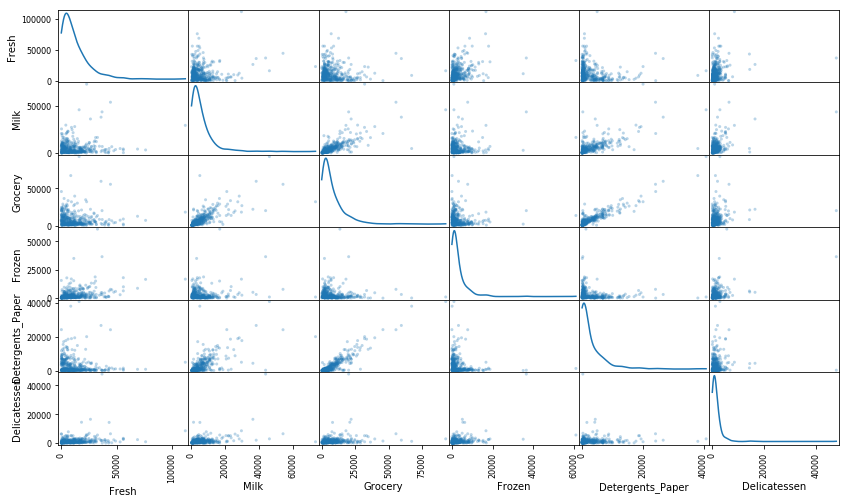

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

In [6]:
# Running corr() function to see how the features are correlated.
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


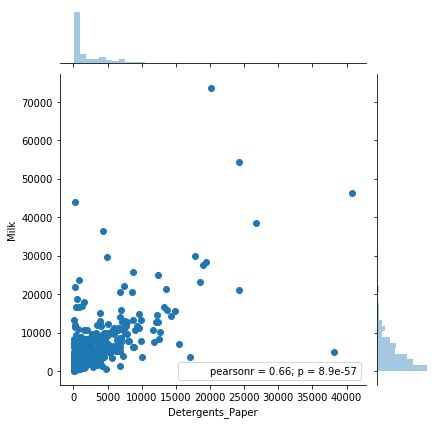

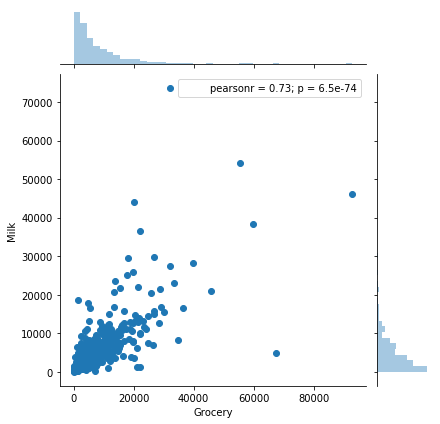

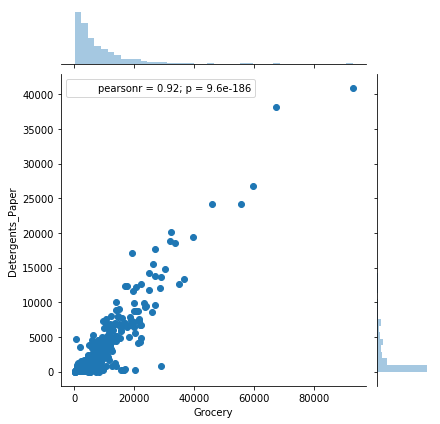

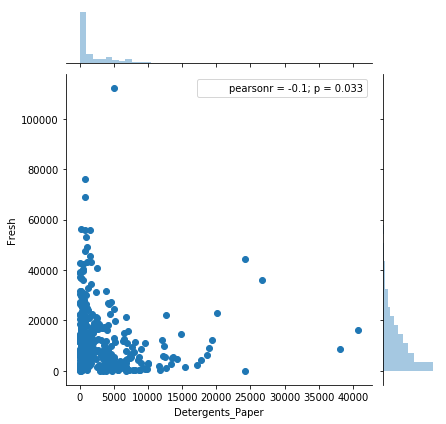

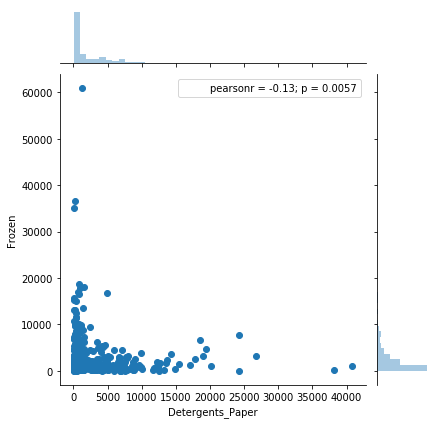

In [7]:
# Using seaborn jointplot to plot some of the highly correlated features
import seaborn as sns

# Plotting the top 3
sns.jointplot(x="Detergents_Paper", y="Milk", data=data)
sns.jointplot(x="Grocery", y="Milk", data=data)
sns.jointplot(x="Grocery", y="Detergents_Paper", data=data)

# Now Plotting the bottom 2 (Just to see how it looks visually)
sns.jointplot(x="Detergents_Paper", y="Fresh", data=data)
sns.jointplot(x="Detergents_Paper", y="Frozen", data=data)

**Answer:**
The following pairs of ffeatures have reasonably good correlation.
1. Grocery, Detergents_Paper
2. Grocery, Milk
3. Detergents_Paper and Milk

I thought Milk is relevant because, it is not much correlated with others. It was based on the r2-score of 0.10. Looks like I was wrong. Looks like 0.10 is good enough score to get a correlation matrix score of greater than 0.5.

Most of the data lie in the lower left corner indicating that the count is less than 50000.
It is not normally distribusted and some kind of scaling/normalization has to be done.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\anilr\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


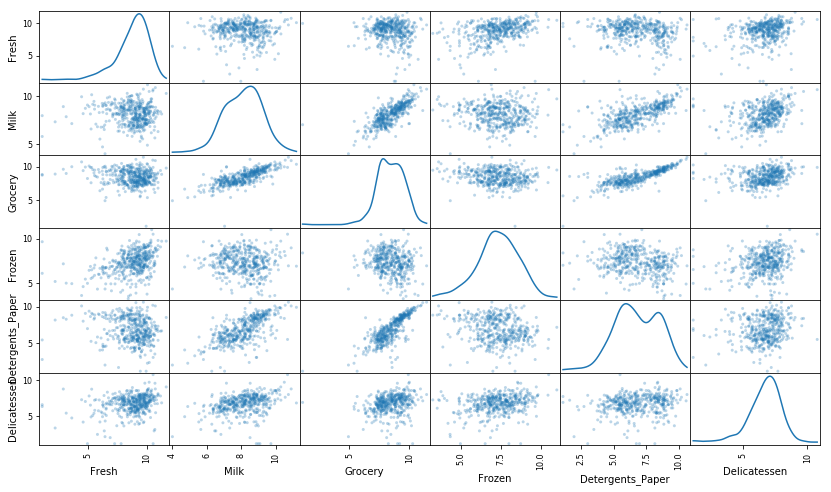

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [9]:
# Running corr() function again
log_data.corr()

# After taking the logs, the correlation between Detergents_Paper and Grocery is not less pronounced.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.964823,8.739536,8.786304,8.331827,8.312381,6.871091
1,8.009363,6.255750,6.749931,8.151910,6.855409,6.588926
2,9.725019,8.274357,8.986447,6.533789,7.771067,6.731018


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
     
# At this point, I don't see any statistidal logic to remove all these data. 
# We have only 440 entries and if we remove all the entries we got, that is a lot of them.

# Another option is to look for entries that appear in all the features.
# While it is definitEly a good idea, I am going to use a different method.
# I am going to find stricter outliers by change the multiplier above to 3 (instead of 1.5)
# The code will look like this.
print "-- Applying more strict rule to find outliers -- "
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 3*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

# I am going to use all of the above data as an outlier and remove it
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [66, 95, 218, 338, 75, 109, 128, 142, 187]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


-- Applying more strict rule to find outliers -- 
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
outliers  = [66, 95, 218, 338, 75, 109, 128, 142, 187]

At this point, I don't see any statistidal logic to remove all the data I got by running the original outlier code.
We have only 440 entries and if we remove all the entries we got, that is a lot of them.

Another option is to look for entries that appear in all the features.
While it is definitely a good idea, I am going to use a different method.
I am going to find stricter outliers by change the multiplier above to 3 (instead of 1.5)

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4714
Dimension 2    0.7410
Dimension 3    0.8418
Dimension 4    0.9376
Dimension 5    0.9802
Dimension 6    0.9999
Name: Explained Variance, dtype: float64


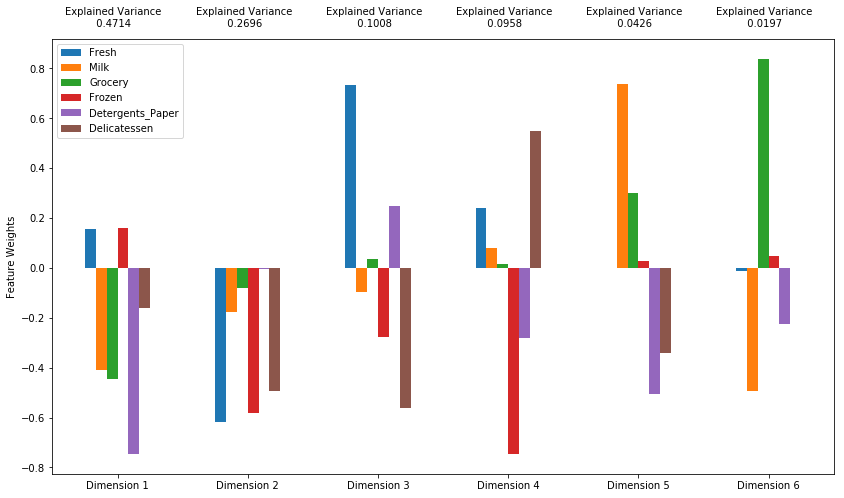

In [12]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print(pca_results['Explained Variance'].cumsum())

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

#### **Answer:**
The first two principal components explains (0.4714+0.2696) 74.1% of the variance.

The first four explain (0.4714+0.2696+0.1008+0.0958) 93.8% of the variance.

Dimension 1: Shows high weightage on Milk, Grocery and Detergents_Paper. So, this dimension is separating customers with high milk usage from low milk usage, high grocery usage from low grocery usage, and so on. So, this dimension may be separating a Cafe from others.

Dimension 2: Shows high weigatage on Fresh, Frozen and Deli. It is exactly opposite of dimension 1. Based on the explanation, I provided for Dimension1, this Dimension may be separating a restaurant from others.

Dimension 3: Shows high weights to Fresh an Deli. Again, similar to previous discussion, this Dimension may be separating a small retail store from others.

Dimension 4: Shows high weights to Frozen and Deli. THis also is separating a small retailer from others.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.3590,-0.9123,0.0714,-1.0159,-0.2250,-0.3107
1,1.5242,0.5272,-0.6116,-1.0818,-1.8331,-0.4591
2,-1.0032,-0.2026,1.1245,0.5527,-0.2324,0.1139


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = decomposition.PCA(2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.3590,-0.9123
1,1.5242,0.5272
2,-1.0032,-0.2026


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

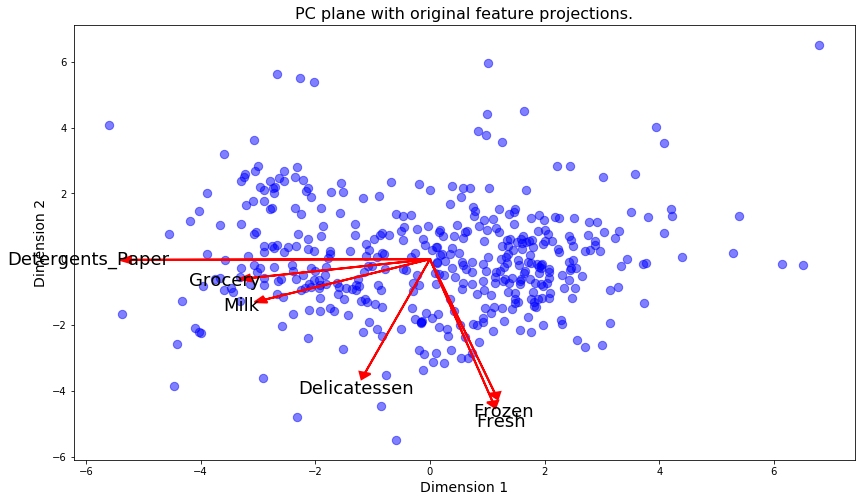

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Dimension 1 is plotted horizontal. So, any plots that are horizontal will have higher correlation with it. Hence, Milk, Grocery and Dertergent_Paper correlate higher with Dimension 1. When the value of those three increase, the value of Dimension 1 decreases.

Similarly, Dimension 2 correlates more with Deli, Fresh and Frozen.

The pca_results plot obtained earlier also show the same result.
For example, for DimenSion 1, Detergent_paper, Grocery, Milk and Deli are negative. (Arrow pointing towards left).
And the length of the arror matches the hight of the plot.

We can similarly argue for Dimension 2 also.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
Advantages of K-Means clustering (https://www.quora.com/What-are-the-advantages-of-K-Means-clustering):
1. Simple and Easy to implement
2. Easy to interpret the results
3. Less computation
4. Works in most of the cases, even if some of the assumptions are not followed.

Advantages of Guassian Mixture Model clustering (GMM) (https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm):
1. The cluster assiment is more flexible. It doesn't assume the distribution of features within each cluster to be sphelical.
2. GMM supports mixed membership. That means, a point can be in different clusters with varying probability.

I have decided to use GMM to see how mixed membership can change the results here. A lot of features in our case are very related. So, it can be intreating to see the outcome.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn import cluster
from sklearn import metrics
from sklearn.mixture import GaussianMixture

all_scores = {}
for (n_classes,cov_type,init_param_val) in [(n_classes,cov_type,init_param_val) for n_classes in range(2,7) for cov_type in ['spherical', 'diag', 'tied', 'full'] for init_param_val in ['random', 'kmeans']]:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_classes, covariance_type=cov_type, max_iter=20, init_params=init_param_val, random_state=0)
    clusterer.fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    # Using metric=Mahalanobis as GMM uses that. (For KMeans, it would have been Euclidean, the default.)
    try:
        score = metrics.silhouette_score(reduced_data, preds, metric='mahalanobis')
    except Exception:
        pass
    
    all_scores[score] = "clusters:{} cov_type:{} init_params:{}".format(n_classes, cov_type, init_param_val)
    # print "{:4f} - clusters:{} cov_type:{} init_params:{}".format(score, n_classes, cov_type, init_param_val)
    
sorted(all_scores.iteritems(), key=lambda key_value:key_value[0])

[(-0.089308307418338895, 'clusters:4 cov_type:diag init_params:random'),
 (0.050941289862799478, 'clusters:6 cov_type:diag init_params:random'),
 (0.05696053576021716, 'clusters:5 cov_type:diag init_params:random'),
 (0.072252719406323621, 'clusters:3 cov_type:spherical init_params:random'),
 (0.10338492916422974, 'clusters:6 cov_type:full init_params:random'),
 (0.12221575308275712, 'clusters:3 cov_type:full init_params:kmeans'),
 (0.15953069102778103, 'clusters:3 cov_type:diag init_params:random'),
 (0.17258399311872802, 'clusters:6 cov_type:tied init_params:random'),
 (0.17354639679786013, 'clusters:5 cov_type:full init_params:random'),
 (0.19548044985016014, 'clusters:4 cov_type:tied init_params:random'),
 (0.20881315463248154, 'clusters:4 cov_type:spherical init_params:random'),
 (0.21775425051553743, 'clusters:6 cov_type:spherical init_params:random'),
 (0.24551027630546005, 'clusters:4 cov_type:full init_params:random'),
 (0.24581853765294154, 'clusters:2 cov_type:spherical init

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
The following are the top seven scores:<br>
 (0.35865989368225287, 'clusters:5 cov_type:diag init_params:kmeans'),<br>
 (0.3608870941357602, 'clusters:5 cov_type:full init_params:kmeans'),<br>
 (0.372122289087642, 'clusters:2 cov_type:tied init_params:random'),<br>
 (0.37247207632413609, 'clusters:2 cov_type:full init_params:kmeans'),<br>
 (0.3736807186894433, 'clusters:2 cov_type:tied init_params:kmeans'),<br>
 (0.37560346875375111, 'clusters:2 cov_type:spherical init_params:kmeans'),<br>
 (0.3804310101099756, 'clusters:5 cov_type:tied init_params:kmeans')<br>
<br>
I will select: 0.375603468753751118 - clusters:2 cov_type:spherical init_params:kmeans<br>
Because, it has the highest score in cluster 2.<br>
Also, all the covariance type has shown up in the highest score list for num-of-clusters=2.<br>
Else, it made sense to pick num-of-clusters=5, as it has the highest score.<br>
<br>
So, Number of clusters: 2<br>
Covariance type: Spherical<br>
Init Params: random<br>

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

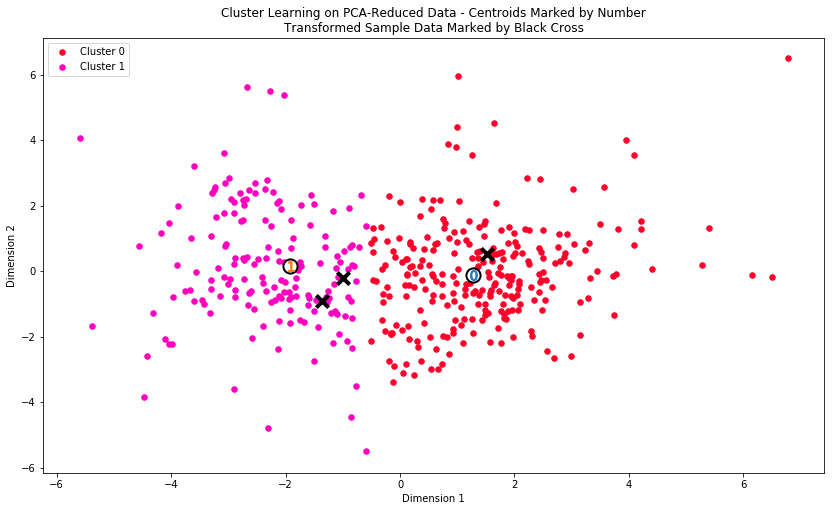

In [24]:
# import inspect

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(2, covariance_type='spherical', max_iter=20, init_params='kmeans', random_state=0)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.means_
    
# Display the results of the clustering from implementation
# print(inspect.getargspec(vs.cluster_results))
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8685.0,2026.0,2652.0,1946.0,350.0,712.0
Segment 1,4448.0,7185.0,10851.0,990.0,3796.0,1043.0


In [26]:
# Printing the original data again.
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
For "Fresh" the center for Segment 0 and 1 are 8685 and 4448. They both are below the mean for the actual data for Fresh (which is 12000). So, at a gross level, there is no difference in both the segments here.
(( Note that, I haven't taken into consideration of the fact that Seg 0 falls in 50% percentile and Seg 1 falls in 25%. ))

For "Milk", the center for Seg0 and Seg1 are 2026 and 7185. The mean is 5796. Thus Seg1 is an above average buyer of milk.

Similarly, for "Frozen", I can say both are below-average buyer.

And for "Grocery", I can say Seg1 is an above-average buyer.

And for "Detergent_paper", Seg1 is an above-average buyer.

And for "Delicatessen", they both are below-average.

So, basically, we can differentiate the segments based on Milk, Grocery and Detergent_paper.
Seg0 is below-average and Seg1 is above-average.

Seg1 can be a restaurant.
And Seg0 can be a super market.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**<br>
Sample points 0 and 2 are in Cluster 1 (Restaurant)<br>
Sample point 1 is in Cluster 0 (Super Market)<br>

In my original analsis while picking up 3 sample points, I thought one point would be in the middle of the division. 
And the other 2 points would be close to the respective centers.
In the cluster result figure above, one point falls very close to the Cluster 0 center.
One point falls close to the middle.
The third one is not close to Cluster 1.
The third point is also close to the middle intersection.
I believe, my predictions were reasonable.

My predictions were:<br>
Sample point 0: Convenient store<br>
Sample point 1: Supermarket store<br>
Sample point 2: Restaurant<br>

My classification of the categories were wrong.
But, as shown in the figure, they follow very close to my original thought process.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
Since we have identified two different segment of customers, we can use A/B testing to see which customer reacts positive to the 3 days/week delivery.

Right now both the segment of customers are having 5days/week delivery.
So, we can attempt to do the following different A/B testing to see how things go.

1. Divide Segment0 customers into A and B - Seg0A, Seg0B. Try 3days/week delivery on Seg0A. And see if the customers of Seg0A are reacting positively. If yes, then it means that the Seg0 customers may like 3days/week delivery and we can try on a larger subset of Seg0 type of customers. If Seg0A doesn't like the 3days/week delivery, then that means, Seg0 customers like 5days/week delivery and it is better to stick with that.
2. Similar experiment can be tried on Seg1 customers.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Once we have the clusters decided, we can use a supervised learner on the data set.
So, the features would be  "Fresh",  "Milk",  "Grocery",  "Frozen",  "Detergents_Paper" and  "Delicatessen".
The target variable would be the "Segment" which we predicted using PCA and GMM.

Now, we can use this supervised model to predict the new customer into Segment0 and Segment1 category.
Once, we have the categories found for the new customers, we can use the output (or learning) from the previous question to assign them a 3days/week or 5days/week delivery schedule.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

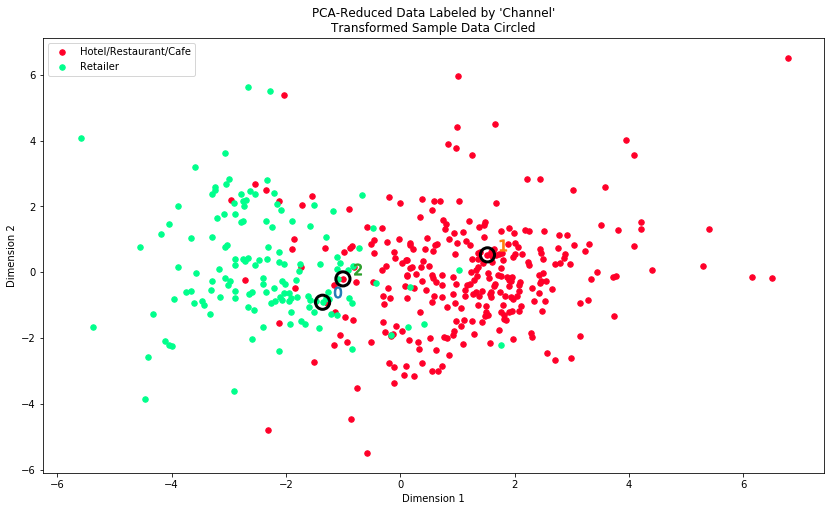

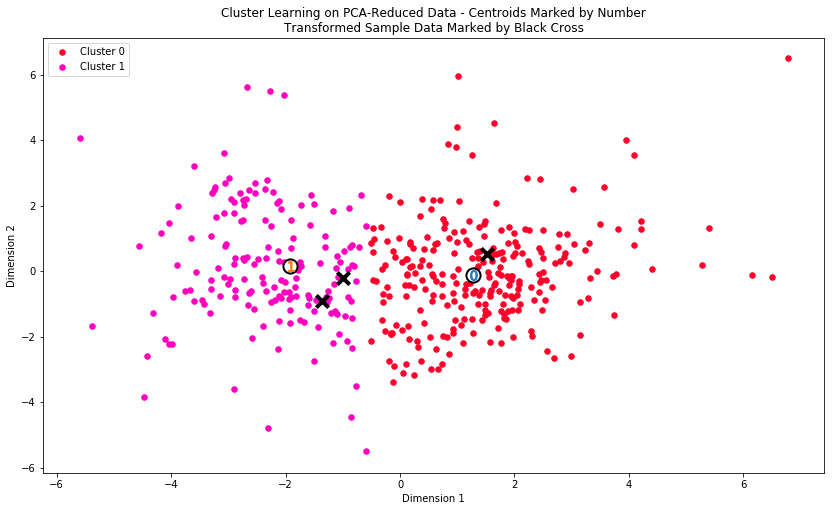

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)


# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The GMM clustering I did matches the undrelying distribution pretty well.
In the distribution already done in the data, there are some RED dots which appear way into the left part of the graph.

At point, I believe that the clustering I did is very consistent with the pre-existing label.

For the sample data, my guesses where:<br>
Sample point 0: Convenient Store<br>
Sample point 1: Supermarket store<br>
Sample point 2: Restaurant<br>

But the real answer is:<br>
Sample point 0: Boundary case between Retailer and Restaurant<br>
Sample point 1: Hotel/Restaurant/Cafe<br>
Sample point 2: Boundary case between Retailer and Restaurant<br>


Well, I was wrong in all but one.
But, I am happy, the clustering did well.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.